In [2]:
from pandas import  *
from seaborn import *
from matplotlib.pyplot import *
from sklearn.linear_model import LinearRegression

In [3]:
df=read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
df['Car Model']=le.fit_transform(df['Car Model'])

In [6]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [7]:
x=(df[['Car Model'	, 'Mileage','Age(yrs)']])
y=(df[['Sell Price($)']])

In [8]:
r=LinearRegression()
r.fit(x,y)
r.score(x,y)

0.8719970367825952

In [9]:
r.predict([[1,35000,3]])

c:\Users\debna\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[36101.34690856]])

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=465)

In [11]:
l=LinearRegression()
l.fit(x_train,y_train)

LinearRegression()

In [12]:
l.score(x_train,y_train)

0.7239532540025527

In [13]:
l.score(x_test,y_test)

0.9881648610436133

In [14]:
l.predict([[1,35000,3]])

c:\Users\debna\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[36410.57467946]])

Both models before and after train- test split almost same error

In [15]:
from sklearn.preprocessing import PolynomialFeatures
r2=PolynomialFeatures(degree=2)# degree=2 is best for lower milage(calculated)
x2=r2.fit_transform(x)     #degree 5 is best gor higher milage

In [16]:
l=LinearRegression()
l.fit(x2,y)


LinearRegression()

In [17]:
l.score(x2,y)

0.9831414882399158

PREDICT PRICE OF CAR BY INPUT - 'carmodel' , 'mileage' , 'age'



FOR CAR MODEL- 
0  { Audi A5 }                 1   [ BMWX5 ]                 2  { Mercedez Benz C class }
             

In [18]:
l.predict(r2.fit_transform([[1,47000,4]]))

array([[30286.82400861]])

In [19]:
l.predict(r2.fit_transform([[1,35000,3]]))

array([[35500.55353947]])

In [20]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


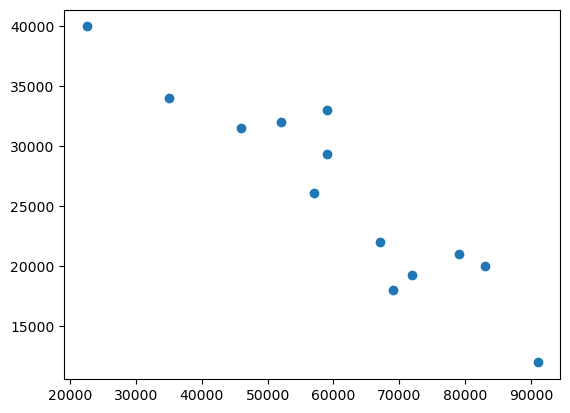

In [21]:
scatter(df['Mileage'],df['Sell Price($)'])

In [22]:
l.predict(r2.fit_transform([[1,70000,4]]))

array([[-112515.78099602]])

In [23]:
l.predict(r2.fit_transform([[2,25000,2]]))

array([[45769.02729977]])

In [24]:
###
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Assuming 'x' and 'y' are defined with your dataset

max_train_accuracy = 0.0  # Initialize maximum training accuracy
best_train_random_state = 0  # Initialize variable to store the random state of the best training accuracy
max_test_accuracy = 0.0  # Initialize maximum testing accuracy
best_test_random_state = 0  # Initialize variable to store the random state of the best testing accuracy

for i in range(465, 1100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    r=LinearRegression()
    r.fit(x_train,y_train)  # Train the model
    train_score = r.score(x_train, y_train)  # Calculate accuracy on the training set
    test_score = r.score(x_test, y_test)  # Calculate accuracy on the test set
    
    # Check for the maximum training accuracy
    if train_score > max_train_accuracy:
        max_train_accuracy = train_score
        best_train_random_state = i

    # Check for the maximum testing accuracy
    if test_score > max_test_accuracy:
        max_test_accuracy = test_score
        best_test_random_state = i

print(f"The maximum training accuracy within the range of random states is: {max_train_accuracy} achieved with random state: {best_train_random_state}")
print(f"The maximum testing accuracy within the range of random states is: {max_test_accuracy} achieved with random state: {best_test_random_state}")


The maximum training accuracy within the range of random states is: 0.9641203677505334 achieved with random state: 734
The maximum testing accuracy within the range of random states is: 0.9881648610436133 achieved with random state: 465


c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


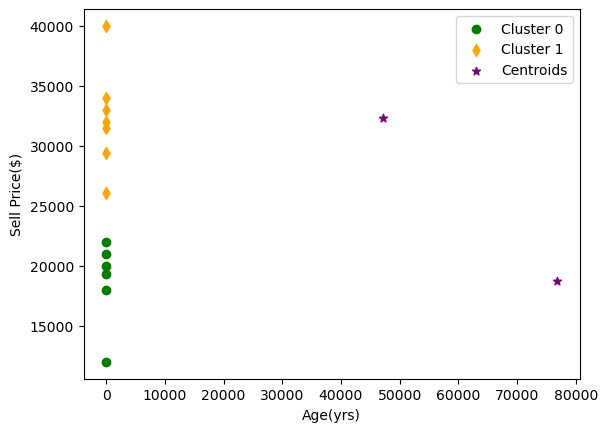

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns: 'Car Model', 'Mileage', 'Sell Price($)', and 'Age(yrs)'

# Select the features for clustering
X = df[['Mileage', 'Sell Price($)']]

# Specify the number of clusters (adjust k as needed)
k = 2

# Fit the KMeans model
kmeans = KMeans(n_clusters=k)
df['cluster'] = kmeans.fit_predict(X)

# Separate the data into clusters
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]

# Plot the clusters
plt.scatter(df1['Age(yrs)'], df1['Sell Price($)'], color='green', marker='o', label='Cluster 0')
plt.scatter(df2['Age(yrs)'], df2['Sell Price($)'], color='orange', marker='d', label='Cluster 1')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='purple', marker='*', label='Centroids')

# Set labels and legend
plt.xlabel('Age(yrs)')
plt.ylabel('Sell Price($)')
plt.legend()
plt.show()


correct clustering(grouping) , but centers are far enough

In [25]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6
